# Analyzing Airbnb data for Boston and Seattle

### Q1: Get the positive and negative factors that can affact 'score' column
### Q2: Find a model to predict the score.
### Q3: What should a host do to improve the score of his house.

Import the basic libraries

In [1]:
# import the basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
# I chooose data from Boston and Seattle AirBNB

boston_cal = pd.read_csv('./data/Boston/calendar.csv', low_memory=False)
boston_list = pd.read_csv('./data/Boston/listings.csv', low_memory=False)
boston_rev = pd.read_csv('./data/Boston/reviews.csv', low_memory=False)

seattle_cal = pd.read_csv('./data/Seattle/calendar.csv', low_memory=False)
seattle_list = pd.read_csv('./data/Seattle/listings.csv', low_memory=False)
seattle_rev = pd.read_csv('./data/Seattle/reviews.csv', low_memory=False)


## Show datas

In [3]:
print('boston calender size: ', boston_cal.shape)
print('boston listings size: ', boston_list.shape)
print('boston reviews size: ', boston_rev.shape)

boston calender size:  (2286360, 7)
boston listings size:  (6264, 106)
boston reviews size:  (225880, 6)


In [4]:
print('seattle calender size: ', seattle_cal.shape)
print('seattle listings size: ', seattle_list.shape)
print('seattle reviews size: ', seattle_rev.shape)

seattle calender size:  (3309455, 7)
seattle listings size:  (9067, 106)
seattle reviews size:  (436392, 6)


We can see that, we get too many datas that we don't need.

In [5]:
boston_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3781,2019-07-14,f,$125.00,$125.00,30,1125
1,3781,2019-07-15,f,$125.00,$125.00,30,1125
2,3781,2019-07-16,f,$125.00,$125.00,30,1125
3,3781,2019-07-17,f,$125.00,$125.00,30,1125
4,3781,2019-07-18,f,$125.00,$125.00,30,1125


In [6]:
boston_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20190714024644,2019-07-14,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,f,f,super_strict_30,f,f,1,1,0,0,0.31
1,5506,https://www.airbnb.com/rooms/5506,20190714024644,2019-07-14,**$99 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...",...,t,f,strict_14_with_grace_period,f,f,6,6,0,0,0.76
2,6695,https://www.airbnb.com/rooms/6695,20190714024644,2019-07-14,$99 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",...,t,f,strict_14_with_grace_period,f,f,6,6,0,0,0.84
3,6976,https://www.airbnb.com/rooms/6976,20190714024644,2019-07-14,Mexican Folk Art Showcase in Boston Neighborhood,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,...,f,f,moderate,t,f,1,0,1,0,0.66
4,8789,https://www.airbnb.com/rooms/8789,20190714024644,2019-07-14,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,f,f,strict_14_with_grace_period,f,f,10,10,0,0,0.38


In [7]:
boston_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...


In [8]:
seattle_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2318,2019-08-18,f,$299.00,$299.00,5,1000
1,2318,2019-08-19,t,$299.00,$299.00,5,1000
2,2318,2019-08-20,f,$490.00,$490.00,5,1000
3,2318,2019-08-21,f,$490.00,$490.00,5,1000
4,2318,2019-08-22,f,$490.00,$490.00,5,1000


Calender data shows the listing id, data, available, price, adjusted_price, minimum_nights and maximum_nights.

In [9]:
seattle_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20190818165751,2019-08-18,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, 1917 Dutch Colo...","Casa Madrona is a gorgeous, architect remodele...","Gorgeous, architect remodeled, 1917 Dutch Colo...",none,Madrona is a hidden gem of a neighborhood. It ...,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.20
1,5682,https://www.airbnb.com/rooms/5682,20190818165751,2019-08-18,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,4.03
2,6606,https://www.airbnb.com/rooms/6606,20190818165751,2019-08-18,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","Soo centrally located, this is a little house ...","This tiny cottage is only 15x10, but it has ev...",none,"A peaceful yet highly accessible neighborhood,...",...,f,f,strict_14_with_grace_period,f,f,3,3,0,0,1.18
3,9419,https://www.airbnb.com/rooms/9419,20190818165751,2019-08-18,Glorious sun room w/ memory foambed,This beautiful double room features a magical ...,Our new Sunny space has a private room from th...,This beautiful double room features a magical ...,none,"Lots of restaurants (see our guide book) bars,...",...,f,f,moderate,t,t,8,0,8,0,1.27
4,9460,https://www.airbnb.com/rooms/9460,20190818165751,2019-08-18,Downtown Convention Center B&B -- Free Minibar,Take up a glass of wine and unwind on one of t...,Greetings from Seattle. Thanks for considering...,Take up a glass of wine and unwind on one of t...,none,The apartment is situated at the intersection ...,...,t,f,moderate,f,f,4,3,1,0,3.60


Obviously, listings data contains too many unnecessary messages, it need to be Extract-Transform-Load later.

In [10]:
seattle_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2318,146,2008-09-15,2451,Kevin,1000 times better than staying at a hotel.
1,2318,126302712,2017-01-10,12332845,Jessica,"Our family (two couples, a two year old and an..."
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list locations we have stayed at! T...
3,2318,147262504,2017-04-25,55817131,Mike,"SUCH an awesome place. Very clean, quiet and s..."
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a distance to be at our only dau...


Reviews data contains comments from guests. And we can see that comments are varied.

## Data preperation

In [11]:
boston_cal[['listing_id']].head()

,listing_id
0,3781
1,3781
2,3781
3,3781
4,3781


In [12]:
boston_list[['id']].head()

,id
0,3781
1,5506
2,6695
3,6976
4,8789


Obviously, we need to merge listings data and calender data(calendar.listing_id = listins.id).

In [13]:
seattle_cal = seattle_cal.rename(columns={'listing_id': 'id'})
boston_cal = boston_cal.rename(columns={'listing_id': 'id'})

In [14]:
seattle_df = pd.merge(seattle_list,seattle_cal,on='id',how='outer')
boston_df = pd.merge(boston_list,boston_cal,on='id',how='outer')

In [15]:
boston_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y
0,3781,https://www.airbnb.com/rooms/3781,20190714024644,2019-07-14,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,1,0,0,0.31,2019-07-14,f,$125.00,$125.00,30,1125
1,3781,https://www.airbnb.com/rooms/3781,20190714024644,2019-07-14,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,1,0,0,0.31,2019-07-15,f,$125.00,$125.00,30,1125
2,3781,https://www.airbnb.com/rooms/3781,20190714024644,2019-07-14,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,1,0,0,0.31,2019-07-16,f,$125.00,$125.00,30,1125
3,3781,https://www.airbnb.com/rooms/3781,20190714024644,2019-07-14,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,1,0,0,0.31,2019-07-17,f,$125.00,$125.00,30,1125
4,3781,https://www.airbnb.com/rooms/3781,20190714024644,2019-07-14,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,1,0,0,0.31,2019-07-18,f,$125.00,$125.00,30,1125


Put two dataframes in one dataframe(concat)

In [16]:
boston_df['city'] = 'boston'
seattle_df['city'] = 'seattle'

In [17]:
df = pd.concat([boston_df,seattle_df],ignore_index=True)

In [18]:
df.shape

(5595815, 112)

#### Working with missing data

##### Checking columns that contains more than 80% miss data

In [19]:
df.count()

id                                              5595815
listing_url                                     5595815
scrape_id                                       5595815
last_scraped                                    5595815
name                                            5595450
summary                                         5488505
space                                           4325980
description                                     5553840
experiences_offered                             5595815
neighborhood_overview                           3932510
notes                                           3363110
transit                                         3808410
access                                          3579190
interaction                                     3908055
house_rules                                     4127055
thumbnail_url                                         0
medium_url                                            0
picture_url                                     

In [20]:
df_80 = df.columns[df.count()/df.shape[0]<=0.80]
df_80

Index(['space', 'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'xl_picture_url', 'host_about', 'host_acceptance_rate',
       'neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'license'],
      dtype='object')

In [21]:
df['space'].value_counts()

At Zeus, we focus exclusively on 30 day+ stays to meet the longer-term needs of our valued guests. When you stay in a Zeus property you will be met with top-notch amenities including premium mattresses and bedding, organic bath products, bath linens, a fully equipped kitchen, and super-fast wifi. Our staff is on call should anything come up that needs our attention or that can make your stay more enjoyable.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

This column talks about the description of the house which given by the house owner. Obviously, 'space' column contains a lot of text information and we can't group them easily. We can just drop it.

In [22]:
df['neighborhood_overview'].value_counts()

Located in central South Lake Union these apartments are a short walk to some well known technology businesses nearby (Amazon, Impinj, Northeastern University, Path). You can also enjoy the large park across the street.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

This column talks about the surrouding of the house. Similarly, we can hardly find some useful imformation from it. We can drop it.

In [23]:
df['notes'].value_counts()

We offer complimentary upgrades to our regular loyal guests                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

Drop it.

In [24]:
df['transit'].value_counts()

This property is conveniently located 15 minutes from General Edward Lawrence Logan International Airport. Boston is America’s Walking City so public transportation is also easily accessible – just a short walk to Fenway T-stop and several MBTA bus lines.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

Same as above

In [25]:
df['access'].value_counts()

You have access to the entire apartment, and all the fantastic amenities this building offers to its tenants.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Same as above.

In [26]:
df['interaction'].value_counts()

We are available to assist you with absolutely anything you need 10 AM through Midnight, 7 days a week by SMS text messaging, email or phone                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

Same as above.

In [27]:
df['house_rules'].value_counts()

- You agree to the following: -  - CHECK-IN: is on or after 5 PM unless otherwise agreed to in writing as our cleaning staff needs sufficient time to prepare. Arriving onsite earlier without approval is trespassing  - KEYS: to return any access keys and remotes with a $50 replacement fee for every lost key and $250 for any remote or entry FOB - BUILDING STAFF/NEIGHBORS: you understand that building staff DO NOT work for us and will not assist you. Do not bother them. We typically host guests staying 30+ nights who tend to be familiar with the premises. If you happen to be an exception, do not share reservation details or engage in any activity that will disturb the tranquility of this residential community. Contact me or my team for ALL questions or directions. We pick-up phones until midnight and are eager to help you  - QUIET HOURS/DISTURBANCE: between 9 PM and 9 AM. No parties, drug use, or gatherings of any kind. Any additional occupants in excess of the # on your reservation must 

Same as above

In [28]:
df['thumbnail_url'].value_counts()

Series([], Name: thumbnail_url, dtype: int64)

Same as above.

In [29]:
df['medium_url'].value_counts()

Series([], Name: medium_url, dtype: int64)

Same as above.

In [30]:
df['xl_picture_url'].value_counts()

Series([], Name: xl_picture_url, dtype: int64)

Same as above.

In [31]:
df['host_about'].value_counts()

We are a passionate team running a modern tech-enabled corp housing co that believes nicely furnished high end homes should be consistent, affordable and easy to book. \r\n\r\nAll our homes are professionally managed, meeting the mark on being clean, well-stocked, having a more or less consistent look and feel, priced below a comparable hotel for an extended stay, and 24/7 SMS support by a virtual concierge team.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Same as above.

In [32]:
df['host_acceptance_rate'].value_counts()

Series([], Name: host_acceptance_rate, dtype: int64)

Same as above.

In [33]:
df['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    610280
Downtown               607360
Capitol Hill           350400
Central Area           286890
Queen Anne             238345
West Seattle           173010
Ballard                170455
Rainier Valley         160235
Cascade                148190
Beacon Hill            121910
University District    100740
Delridge                99645
Northgate               76285
Magnolia                61685
Lake City               57670
Seward Park             31755
Interbay                14600
Name: neighbourhood_group_cleansed, dtype: int64

This column(neighbourhood_group_cleansed) seems contains some important information, but this column miss more than 80% values. Let's get into it.

In [34]:
df[df['city']=='seattle']['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    610280
Downtown               607360
Capitol Hill           350400
Central Area           286890
Queen Anne             238345
West Seattle           173010
Ballard                170455
Rainier Valley         160235
Cascade                148190
Beacon Hill            121910
University District    100740
Delridge                99645
Northgate               76285
Magnolia                61685
Lake City               57670
Seward Park             31755
Interbay                14600
Name: neighbourhood_group_cleansed, dtype: int64

Obviouly, we can't use this column when concidering both Boston and Seattle. Drop this column.

In [35]:
df['square_feet'].value_counts()

600.0     67890
1000.0    32120
300.0     10220
500.0      8760
495.0      7300
400.0      6205
1200.0     5475
460.0      4380
580.0      4380
537.0      2920
750.0      2190
1100.0     2190
1296.0     1825
0.0        1825
1500.0     1825
850.0      1460
1400.0     1460
650.0      1460
900.0      1460
615.0      1460
390.0      1095
450.0      1095
2600.0     1095
800.0      1095
1600.0     1095
120.0      1095
440.0      1095
470.0      1095
694.0       730
380.0       730
          ...  
190.0       365
183.0       365
170.0       365
220.0       365
2750.0      365
452.0       365
794.0       365
2400.0      365
2200.0      365
2100.0      365
1800.0      365
1250.0      365
1058.0      365
950.0       365
875.0       365
860.0       365
832.0       365
751.0       365
485.0       365
745.0       365
731.0       365
714.0       365
712.0       365
710.0       365
695.0       365
685.0       365
675.0       365
563.0       365
555.0       365
653.0       365
Name: square_feet, Lengt

In [36]:
df['square_feet'].count()

198560

Even 'square_feet' is a vary import indicator, this column miss too many values and can be hardly filled up. Drop it.

In [37]:
df['weekly_price'].value_counts()

$600.00      24090
$1,000.00    23725
$500.00      23360
$450.00      17155
$250.00      15330
$550.00      14965
$650.00      14600
$700.00      14235
$1,200.00    12775
$900.00      12775
$800.00      12410
$400.00      12045
$750.00      11315
$350.00      10220
$300.00       9125
$1,100.00     8395
$1,500.00     7300
$950.00       7300
$850.00       7300
$1,400.00     6570
$1,250.00     6205
$1,300.00     5475
$575.00       5110
$2,000.00     4745
$525.00       4015
$625.00       3650
$875.00       3650
$560.00       3650
$1,800.00     3650
$325.00       3650
             ...  
$821.00        365
$343.00        365
$1,008.00      365
$440.00        365
$903.00        365
$653.00        365
$665.00        365
$170.00        365
$5,499.00      365
$455.00        365
$555.00        365
$549.00        365
$3,100.00      365
$693.00        365
$893.00        365
$1,107.00      365
$1,045.00      365
$976.00        365
$345.00        365
$5,000.00      365
$327.00        365
$269.00     

In [38]:
df['weekly_price'].count()

560640

'weekly_price' is also a very import indicator here. Keep it and try to fill up this column.

In [39]:
df['monthly_price'].value_counts()

$3,000.00     19345
$3,500.00     16790
$2,500.00     16060
$2,000.00     12045
$1,200.00     10950
$1,500.00     10585
$1,800.00      9855
$750.00        9125
$2,800.00      9125
$2,200.00      8760
$1,600.00      8760
$4,000.00      8395
$5,000.00      7300
$1,000.00      7300
$1,400.00      6205
$2,100.00      5840
$3,200.00      5840
$950.00        5475
$1,700.00      5475
$1,300.00      5110
$900.00        5110
$1,900.00      4745
$1,895.00      4745
$1,850.00      4380
$2,600.00      4380
$1,100.00      4380
$2,700.00      4380
$1,750.00      4380
$8,070.00      4015
$2,400.00      4015
              ...  
$1,743.00       365
$700.00         365
$1,395.00       365
$1,419.00       365
$13,500.00      365
$1,975.00       365
$14,900.00      365
$980.00         365
$8,900.00       365
$7,119.00       365
$2,330.00       365
$1,875.00       365
$3,189.00       365
$4,680.00       365
$3,240.00       365
$3,995.00       365
$3,120.00       365
$2,140.00       365
$3,045.00       365


In [40]:
df['monthly_price'].count()

464645

Same as above.

In [41]:
df['security_deposit'].value_counts()

$0.00        1568770
$500.00       608820
$100.00       449315
$200.00       374490
$300.00       345290
$250.00       237980
$150.00       233965
$400.00       160235
$1,000.00     101105
$350.00        63510
$1,500.00      25550
$125.00        17155
$2,000.00      14965
$600.00        13870
$750.00        12410
$95.00         12045
$700.00        12045
$800.00        11680
$450.00         9855
$5,000.00       8760
$175.00         8030
$120.00         5110
$3,000.00       4015
$199.00         3285
$180.00         3285
$1,200.00       2920
$999.00         2920
$2,500.00       2920
$275.00         2920
$550.00         2555
              ...   
$115.00          365
$111.00          365
$3,500.00        365
$149.00          365
$140.00          365
$119.00          365
$425.00          365
$2,600.00        365
$220.00          365
$192.00          365
$2,400.00        365
$155.00          365
$4,300.00        365
$360.00          365
$1,800.00        365
$1,495.00        365
$1,399.00    

Keep this column and fill up it with 0, because none value means zero security deposit.

In [42]:
df['license'].value_counts()

WA-6736-TA​​​​​​​                              17155
27-2019869                                     12410
City registration pending                      11315
STR-OPLI-19-000350                             10585
18-00034                                        5475
STR-OPAP-19-000632                              4745
STR-STUN-19-000275                              4015
City of Seattle license application pending     3650
WA-6776-TA                                      3650
19-000191                                       2920
0010119783                                      2555
LB-101773                                       2555
19-000335                                       2555
12-345678                                       2190
17-101096                                       2190
STR-OPAP-19-000364                              2190
STR-OPLI-19-000220                              1825
770760                                          1825
19-000416                                     

Drop it.

Now, we need to drop 'space', 'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'xl_picture_url', 'host_about', 'host_acceptance_rate',
       'neighbourhood_group_cleansed', 'square_feet', 'license'
       
and fill up 'weekly_price','monthly_price', 'security_deposit'.

In [43]:
list_drop = ['space', 'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'xl_picture_url', 'host_about', 'host_acceptance_rate',
       'neighbourhood_group_cleansed', 'square_feet', 'license']

In [44]:
df.drop(columns=list_drop, inplace=True)

In [45]:
df[df['weekly_price']==0]

,id,listing_url,scrape_id,last_scraped,name,summary,description,experiences_offered,picture_url,host_id,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y


In [46]:
df[df['monthly_price']==0]

,id,listing_url,scrape_id,last_scraped,name,summary,description,experiences_offered,picture_url,host_id,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y


In [47]:
df[df['security_deposit']==0]

,id,listing_url,scrape_id,last_scraped,name,summary,description,experiences_offered,picture_url,host_id,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y


According to this, we can assume that as to the column 'security_deposit', empty means 0. But it's hardly to say more than 80% of the houses are free to live.

In [48]:
df.shape

(5595815, 97)

In [49]:
df.select_dtypes(include=['float', 'int']).columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights_x',
       'maximum_nights_x', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'minimum_nigh

In [50]:
df.select_dtypes(include=['object']).columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'description',
       'experiences_offered', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price_x', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'has_availability', 'calendar_last_scraped', 'first_review',
       'last_review', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_pro

Before we fill up the other three colums, we need to deal with some data type problems.

Drop other columns from columns that contains categorical variables.

Obviouly, columns named 'description', 'country*', '*_url', 'state', 'street'... are useless.

In [51]:
list_drop2=['country', 'country_code', 'description', 'host_name', 'host_picture_url', 
           'host_thumbnail_url', 'host_url', 'last_scraped', 'smart_location', 
            'host_verifications', 'listing_url', 'name', 'picture_url', 'last_scraped', 'market',
            'state', 'street', 'summary', 'zipcode', 'requires_license', 
            'host_neighbourhood', 'experiences_offered', 'calendar_last_scraped',
            'jurisdiction_names', 'is_business_travel_ready', 'price_y']

In [52]:
df.drop(columns=list_drop2, inplace=True)

In [53]:
df.select_dtypes(include=['object']).columns

Index(['host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'city', 'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price_x', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'has_availability', 'first_review', 'last_review', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'date', 'available',
       'adjusted_price'],
      dtype='object')

Convert some values to int or float. 

In [54]:
df.rename(columns={'price_x':'price'}, inplace=True)

In [55]:
df['cleaning_fee']=df['cleaning_fee'].replace('[$,]','',regex=True).astype(float)
df['extra_people']=df['extra_people'].replace('[$,]','',regex=True).astype(float)
df['monthly_price']=df['monthly_price'].replace('[$,]','',regex=True).astype(float)
df['weekly_price']=df['weekly_price'].replace('[$,]','',regex=True).astype(float)
df['adjusted_price']=df['adjusted_price'].replace('[$,]','',regex=True).astype(float)
df['price']=df['price'].replace('[$,]','',regex=True).astype(float)
df['security_deposit']=df['security_deposit'].replace('[$,]','',regex=True).astype(float)

Now we can deal with 'weekly_price', 'monthly_price', 'security_deposit' colums and fill up 'cleaning_fee', 'extra_people'.

In [56]:
df['weekly_price'].fillna(df['weekly_price'].mean(), inplace=True)
df['monthly_price'].fillna(df['monthly_price'].mean(), inplace=True)
df['adjusted_price'].fillna(df['adjusted_price'].mean(), inplace=True)
df['security_deposit'].fillna(0, inplace=True)
df['cleaning_fee'].fillna(value=0, inplace=True)
df['extra_people'].fillna(value=0, inplace=True)
df.head()

,id,scrape_id,host_id,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,date,available,adjusted_price,minimum_nights_y,maximum_nights_y
0,3781,20190714024644,4804,2008-12-03,Massachusetts,within a day,80%,t,4.0,4.0,...,1,1,0,0,0.31,2019-07-14,f,125.0,30,1125
1,3781,20190714024644,4804,2008-12-03,Massachusetts,within a day,80%,t,4.0,4.0,...,1,1,0,0,0.31,2019-07-15,f,125.0,30,1125
2,3781,20190714024644,4804,2008-12-03,Massachusetts,within a day,80%,t,4.0,4.0,...,1,1,0,0,0.31,2019-07-16,f,125.0,30,1125
3,3781,20190714024644,4804,2008-12-03,Massachusetts,within a day,80%,t,4.0,4.0,...,1,1,0,0,0.31,2019-07-17,f,125.0,30,1125
4,3781,20190714024644,4804,2008-12-03,Massachusetts,within a day,80%,t,4.0,4.0,...,1,1,0,0,0.31,2019-07-18,f,125.0,30,1125


In [57]:
df.columns[(df.count()/len(df)) <= .50]

Index([], dtype='object')

In [58]:
df.select_dtypes(include=['object']).columns

Index(['host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'city', 'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'calendar_updated', 'has_availability', 'first_review',
       'last_review', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'date', 'available'],
      dtype='object')

In [59]:
df['host_location'].value_counts()

Seattle, Washington, United States                 2693700
Boston, Massachusetts, United States               1377510
US                                                  504065
San Francisco, California, United States            177390
New York, New York, United States                    98915
Spokane, Washington, United States                   82855
Hawthorne, New Jersey, United States                 48910
Massachusetts, United States                         41245
United States                                        27740
Cambridge, Massachusetts, United States              26280
CA                                                   21535
Middlesex County, Massachusetts, United States       20075
Mississauga, Ontario, Canada                         17520
Los Angeles, California, United States               16790
Bellevue, Washington, United States                  16790
Brooklyn, New York, United States                    10220
Somerville, Massachusetts, United States              91

In [60]:
df.drop(columns='host_location', inplace=True)

In [61]:
df['host_response_time'].value_counts()

within an hour        3673725
within a few hours     642765
within a day           247835
a few days or more      31755
Name: host_response_time, dtype: int64

In [62]:
df['host_response_rate'].value_counts()

100%    3192290
99%      567575
98%      150745
93%      113880
90%      106215
95%       59495
80%       41975
96%       36135
97%       35770
91%       31755
94%       25915
89%       25550
76%       24820
88%       21535
0%        14965
70%       14600
86%       14235
50%       12045
75%       10950
92%       10950
83%       10585
67%       10220
60%        6935
87%        5110
33%        4745
25%        4745
71%        4745
85%        4015
64%        2920
73%        2555
81%        2555
77%        2190
82%        2190
78%        2190
54%        1825
40%        1825
79%        1825
53%        1825
48%        1460
72%        1460
69%        1095
57%        1095
65%         730
63%         730
30%         730
41%         730
44%         365
29%         365
26%         365
22%         365
20%         365
17%         365
56%         365
68%         365
38%         365
55%         365
Name: host_response_rate, dtype: int64

'host_response_rate' is more specific indicator, so we drop 'host_response_time' column.

In [63]:
df.drop(columns='host_response_time', inplace=True)

In [64]:
df['host_is_superhost'].value_counts()

f    3659125
t    1934865
Name: host_is_superhost, dtype: int64

In [65]:
df['host_has_profile_pic'].value_counts()

t    5587055
f       6935
Name: host_has_profile_pic, dtype: int64

In [66]:
df['host_identity_verified'].value_counts()

f    2831305
t    2762685
Name: host_identity_verified, dtype: int64

In [67]:
for col in ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']:
    df[col].replace('f','False', inplace=True)
    df[col].replace('t', 'True', inplace=True)

In [68]:
df['host_is_superhost'].value_counts()

False    3659125
True     1934865
Name: host_is_superhost, dtype: int64

In [69]:
df['neighbourhood'].value_counts()

Capitol Hill                 279955
Allston-Brighton             256595
Dorchester                   209875
Queen Anne                   205495
Belltown                     182500
Back Bay                     181040
Jamaica Plain                179580
Minor                        171185
Ballard                      170820
South Boston                 162425
South End                    149650
Fenway/Kenmore               148555
Roxbury                      141620
Downtown                     131400
East Boston                  127385
First Hill                   127020
Wallingford                  119355
North Beacon Hill            109865
Pike Place Market            109135
Fremont                      108770
University District          100740
Beacon Hill                  100375
Central Business District     98185
North End                     89060
South Lake Union              84680
Mission Hill                  82125
Greenwood                     74460
West End                    

In [70]:
df['neighbourhood_cleansed'].value_counts()

Dorchester                   211700
Broadway                     209510
Belltown                     186515
Downtown                     181405
Jamaica Plain                180675
Back Bay                     162790
Brighton                     154760
South End                    147095
Fenway                       145635
Roxbury                      137605
East Boston                  127385
Allston                      125560
First Hill                   124100
Wallingford                  120085
South Boston                 119355
Minor                        109500
Fremont                      108405
Pike-Market                  102930
Central Business District    101470
University District          100740
Beacon Hill                   93805
North End                     88330
Stevens                       87965
South Lake Union              83950
Mission Hill                  81030
Greenwood                     74095
Lower Queen Anne              71175
North Beacon Hill           

We just need to keep one column. Drop neighbourhood column.

In [71]:
df.drop(columns='neighbourhood', inplace=True)

In [72]:
df['is_location_exact'].value_counts()

t    4609220
f     986595
Name: is_location_exact, dtype: int64

In [73]:
df['is_location_exact'].replace('f', 'False', inplace=True)
df['is_location_exact'].replace('t', 'True', inplace=True)
df.head(1)

,id,scrape_id,host_id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,date,available,adjusted_price,minimum_nights_y,maximum_nights_y
0,3781,20190714024644,4804,2008-12-03,80%,True,4.0,4.0,True,False,...,1,1,0,0,0.31,2019-07-14,f,125.0,30,1125


In [74]:
df['property_type'].value_counts()

Apartment                 2684210
House                     1387365
Condominium                406245
Guest suite                354415
Townhouse                  321200
Serviced apartment         108770
Guesthouse                  92710
Loft                        62415
Bungalow                    35405
Bed and breakfast           28105
Other                       25915
Cottage                     22265
Boat                         8760
Tiny house                   8030
Hotel                        7665
Villa                        6570
Boutique hotel               5840
Houseboat                    5475
Hostel                       5475
Camper/RV                    5475
Cabin                        5110
Dome house                   2555
Resort                       1095
Yurt                          730
Farm stay                     730
Tent                          730
Barn                          365
Aparthotel                    365
Nature lodge                  365
Chalet        

In [75]:
df['amenities'].value_counts()

{TV,Internet,Wifi,"Air conditioning",Kitchen,Gym,Elevator,Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in","Smart lock",Keypad,"Building staff","Private living room"}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 23725
{TV,Internet,Wifi,Kitchen,Gym,Elevator,Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon

In [76]:
count_list = lambda x: x.count(',')+1
df['amenities'] = df['amenities'].apply(count_list)

In [77]:
df['amenities'].value_counts()

32    225935
21    219365
27    217175
31    214985
18    208415
19    208415
25    190895
24    189435
17    189435
33    185785
23    178485
16    174835
20    173010
22    171550
30    167900
34    165345
29    163155
28    160600
26    158045
35    155490
15    151840
36    130670
14    127385
13    118625
37    108040
12    100010
38     96725
39     94170
40     90885
10     77380
       ...  
54     10220
57      9125
1       8030
5       7665
60      7665
61      7665
59      7300
58      6570
62      4745
2       4380
63      3650
3       3285
4       2920
70      2920
67      2920
65      2555
68      1825
64      1825
71      1460
66      1460
75      1095
69       730
74       730
89       365
90       365
82       365
80       365
76       365
72       365
98       365
Name: amenities, Length: 80, dtype: int64

In [78]:
df['calendar_updated'].value_counts()

today            1939610
2 weeks ago       325945
yesterday         310980
a week ago        248565
3 weeks ago       217905
2 months ago      216445
3 days ago        185785
3 months ago      172280
4 weeks ago       143080
4 days ago        137605
5 weeks ago       129940
5 days ago        118625
4 months ago      112420
2 days ago        108770
6 weeks ago        87235
6 days ago         77380
5 months ago       63145
6 months ago       56575
7 weeks ago        54020
7 months ago       49640
8 months ago       39055
12 months ago      38325
9 months ago       35040
13 months ago      33215
11 months ago      32485
23 months ago      29565
1 week ago         29200
20 months ago      27375
16 months ago      26645
25 months ago      26645
                  ...   
28 months ago      15695
29 months ago      14965
45 months ago      13870
39 months ago      13505
34 months ago      12775
31 months ago      12045
32 months ago      12045
41 months ago      11315
33 months ago      11315


In [79]:
def convert_calendar_int(x):
    if('a week' in x):
        return 1
    elif('week' in x):
        return str.split(x)[0]
    elif ('month' in x):
        return int(str.split(x)[0])*4
    elif ('never' in x):
        return int(0)
    else:
        return int(1)
df['calendar_updated']=df['calendar_updated'].apply(lambda x:convert_calendar_int(x))

In [80]:
df['has_availability'].value_counts()

t    5595815
Name: has_availability, dtype: int64

In [81]:
df['has_availability'].fillna('False', inplace=True)
df['has_availability'].replace('t','True', inplace=True)

In [82]:
df['first_review'].value_counts()

2017-09-04    14600
2018-09-03    14235
2018-05-20    13505
2019-06-30    12045
2019-05-27    12045
2019-07-07    11680
2018-05-21    11680
2018-01-01    11680
2018-04-08    11315
2019-05-26    10950
2018-07-22    10950
2017-07-16    10950
2018-05-28    10585
2019-03-31    10585
2018-06-17    10220
2018-08-19    10220
2019-04-21    10220
2018-07-15    10220
2019-05-19     9490
2016-09-05     9490
2018-06-10     9490
2019-04-14     9490
2019-05-31     9125
2017-09-17     9125
2018-06-24     9125
2017-06-11     9125
2018-09-23     9125
2019-01-01     8760
2019-06-23     8760
2019-04-15     8760
              ...  
2013-10-18      365
2019-02-14      365
2013-05-19      365
2013-01-20      365
2014-02-12      365
2016-11-15      365
2011-06-20      365
2016-01-25      365
2015-03-20      365
2015-03-31      365
2015-02-15      365
2015-03-01      365
2009-07-17      365
2010-07-19      365
2014-09-19      365
2014-07-02      365
2014-05-09      365
2016-03-24      365
2011-09-06      365


In [83]:
df['last_review'].value_counts()

2019-08-11    133225
2019-08-15    121180
2019-08-12    109500
2019-07-07     87965
2019-06-27     86505
2019-08-14     85045
2019-08-03     84315
2019-08-16     81030
2019-06-29     78110
2019-06-28     77380
2019-08-13     77380
2019-08-10     75920
2019-06-30     70080
2019-08-04     68255
2019-08-02     65700
2019-06-23     62780
2019-06-26     61685
2019-08-09     61320
2019-07-28     58400
2019-08-05     57670
2019-07-31     55115
2019-08-01     50735
2019-08-17     48180
2019-07-30     47085
2019-08-07     45990
2019-06-24     44895
2019-07-29     44530
2019-07-27     42340
2019-06-25     41975
2019-07-01     41610
               ...  
2018-02-20       365
2016-10-12       365
2015-07-28       365
2018-04-27       365
2017-09-16       365
2016-12-10       365
2017-02-19       365
2015-05-17       365
2016-03-24       365
2016-04-02       365
2014-09-19       365
2018-11-02       365
2017-03-17       365
2016-06-03       365
2018-04-09       365
2015-05-04       365
2015-06-14   

In [84]:
df.drop(columns=['first_review', 'last_review'], inplace=True)

In [85]:
df['instant_bookable'].value_counts()

t    2815245
f    2780570
Name: instant_bookable, dtype: int64

In [86]:
df['instant_bookable'].replace('f', 'False', inplace=True)
df['instant_bookable'].replace('t', 'True', inplace=True)

In [87]:
df['cancellation_policy'].value_counts()

strict_14_with_grace_period    2368850
moderate                       1702725
flexible                       1235160
strict                          234330
super_strict_30                  46355
super_strict_60                   8395
Name: cancellation_policy, dtype: int64

In [88]:
df['require_guest_profile_picture'].value_counts()

f    5336300
t     259515
Name: require_guest_profile_picture, dtype: int64

In [89]:
df['require_guest_profile_picture'].replace('f', 'False', inplace=True)
df['require_guest_profile_picture'].replace('t', 'True', inplace=True)

In [90]:
df['require_guest_phone_verification'].value_counts()

f    5270235
t     325580
Name: require_guest_phone_verification, dtype: int64

In [91]:
df['require_guest_phone_verification'].replace('f', 'False', inplace=True)
df['require_guest_phone_verification'].replace('t', 'True', inplace=True)

In [92]:
df['available'].value_counts()

f    3540565
t    2055250
Name: available, dtype: int64

In [93]:
df['available'].replace('f', 'False', inplace=True)
df['available'].replace('t', 'True', inplace=True)

Dealing with numerical columns

In [94]:
num_index = df.select_dtypes(include=['float', 'int']).columns

In [95]:
df_num = df[num_index]
df_num.columns[(df_num.count()/len(df)) < 1]

Index(['host_listings_count', 'host_total_listings_count', 'bathrooms',
       'bedrooms', 'beds', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [96]:
df['review_scores_rating'].value_counts()

100.0    983310
98.0     502240
99.0     448585
97.0     433985
96.0     372665
95.0     307330
93.0     261340
94.0     215715
90.0     193450
92.0     146365
80.0     139430
91.0     121545
89.0      85775
87.0      84315
88.0      77380
85.0      50735
86.0      35405
84.0      34310
60.0      32120
83.0      24820
73.0      17885
82.0      15330
70.0      14235
77.0       9490
75.0       8760
20.0       8760
76.0       7300
40.0       6570
81.0       6570
78.0       5840
67.0       5840
74.0       4745
79.0       2555
72.0       2555
50.0       2190
68.0       1825
71.0       1460
53.0       1460
66.0       1095
64.0       1095
65.0       1095
69.0        730
63.0        365
55.0        365
30.0        365
Name: review_scores_rating, dtype: int64

We can find out that column 'review_scores_rating' contributed by columns ''review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month''. 
We just keep column 'review_scores_rating'.

In [97]:
df['score'] = df['review_scores_rating']

In [98]:
list_review = df.filter(regex='review_scores').columns
list_review

Index(['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

In [99]:
df.drop(columns=list_review, inplace=True)

In [100]:
df.select_dtypes(include=['float', 'int']).columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights_x', 'maximum_nights_x',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'adjusted_price', 'minimum_nights_y', 'maximum_nights_y', 'score'],
      dtype='object')

In [101]:
df['minimum_nights'] = df['minimum_nights_x']
df['maximum_nights'] = df['maximum_nights_x']

In [102]:
list_numerical_drop = ['id', 'scrape_id', 'host_id', 'minimum_nights_x', 'maximum_nights_x', 
                       'minimum_nights_y', 'maximum_nights_y']

In [103]:
df.drop(columns=list_numerical_drop, inplace=True)

Other missing values

In [104]:
df_miss = df.columns[(df.count()/len(df)) < 1]
df_miss

Index(['host_since', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'bathrooms',
       'bedrooms', 'beds', 'reviews_per_month', 'score'],
      dtype='object')

Now we need to drop the empty rows.

In [105]:
df.dropna(subset=df_miss, inplace=True, axis=0)

In [106]:
df.shape

(3940175, 56)

Now we have cleant all missing values, and we need to continue check the object columns

In [107]:
df_obj = df.select_dtypes(include=['object']).columns

In [108]:
df['host_since'].value_counts()

2014-02-14    102930
2013-08-30    101105
2015-01-30     46720
2015-12-04     45625
2013-02-04     36135
2015-03-30     33215
2016-07-11     32120
2012-07-27     29930
2018-12-04     27740
2011-07-13     24820
2013-10-14     24455
2017-02-01     20440
2014-10-09     19710
2016-08-23     18980
2016-09-16     18615
2010-01-27     18250
2011-10-03     17520
2012-11-11     16060
2011-09-06     15330
2017-07-13     15330
2017-07-06     14965
2016-01-16     14600
2011-05-17     14600
2018-07-26     13140
2014-07-21     12410
2016-07-08     12045
2016-06-21     11680
2014-09-10     10950
2011-11-26     10585
2015-11-08     10220
               ...  
2010-08-05       365
2018-09-07       365
2012-07-30       365
2013-12-08       365
2012-07-03       365
2019-01-31       365
2017-02-21       365
2017-10-04       365
2017-01-06       365
2017-02-13       365
2009-09-01       365
2012-02-18       365
2017-04-27       365
2017-12-08       365
2014-11-05       365
2017-02-22       365
2017-10-29   

In [109]:
df.replace(inplace=True,to_replace='t',value=True)
df.replace(inplace=True,to_replace='f',value=False)

In [110]:
#host_is_superhost

In [111]:
df_obj_1 = df[df_obj].head(1)

In [112]:
df.select_dtypes(include=['object']).columns

Index(['host_since', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'city', 'is_location_exact', 'property_type',
       'room_type', 'bed_type', 'calendar_updated', 'has_availability',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'date', 'available'],
      dtype='object')

In [113]:
df['host_response_rate'].value_counts()

100%    2879120
99%      433255
98%      114975
90%       96360
93%       74095
95%       46355
80%       35770
96%       32485
97%       25915
88%       19345
91%       18250
89%       17155
94%       16790
70%       12410
86%       11680
92%       10220
50%        9490
0%         9125
83%        8395
75%        7665
67%        6570
60%        5110
76%        4745
87%        4745
85%        4015
71%        3650
33%        3285
73%        2555
81%        2555
64%        2190
77%        2190
82%        2190
78%        1825
53%        1825
54%        1460
25%        1460
79%        1460
40%        1460
69%        1095
57%        1095
72%        1095
30%         730
65%         730
63%         730
29%         365
26%         365
56%         365
38%         365
41%         365
55%         365
48%         365
Name: host_response_rate, dtype: int64

In [114]:
df['host_response_rate']=df['host_response_rate'].replace('[%]','',regex=True)
df['host_response_rate']=df['host_response_rate'].astype(float)

In [115]:
df.drop(columns=['date','calendar_updated', 'host_since'], inplace=True)

Double check the numerical columns.

In [116]:
df.select_dtypes(include=['float', 'int']).columns

Index(['host_response_rate', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'adjusted_price', 'score', 'minimum_nights', 'maximum_nights'],
      dtype='object')

In [117]:
list_drop_numerical = ['host_listings_count', 'latitude', 'longitude', 
                      'minimum_minimum_nights', 'maximum_minimum_nights',
                      'minimum_maximum_nights', 'maximum_maximum_nights',
                      'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
                      'adjusted_price']

In [118]:
df.drop(columns=list_drop_numerical, inplace=True)

In [119]:
list_cat = df.select_dtypes(include=['object']).columns
list_cat

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'city', 'is_location_exact', 'property_type',
       'room_type', 'bed_type', 'has_availability', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'available'],
      dtype='object')

In [120]:
df =pd.get_dummies(df, columns=list_cat, drop_first=True)
df.head(2)

,host_response_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,amenities,price,weekly_price,monthly_price,...,bed_type_Real Bed,instant_bookable_True,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_True,require_guest_phone_verification_True,available_True
0,80.0,4.0,2,1.0,1.0,1.0,31,125.0,750.0,2250.0,...,1,0,0,0,0,1,0,0,0,0
1,80.0,4.0,2,1.0,1.0,1.0,31,125.0,750.0,2250.0,...,1,0,0,0,0,1,0,0,0,0


## Modeling

In [121]:
corr_matrix = df.corr()

In [122]:
df.select_dtypes(include=['bool']).columns

Index([], dtype='object')

In [123]:
corr_matrix['price'].sort_values(ascending=False)

price                                               1.000000
host_total_listings_count                           0.497184
accommodates                                        0.452723
beds                                                0.395042
bedrooms                                            0.392926
cleaning_fee                                        0.367075
guests_included                                     0.318110
bathrooms                                           0.306648
calculated_host_listings_count_entire_homes         0.229228
cancellation_policy_strict_14_with_grace_period     0.217630
calculated_host_listings_count                      0.207275
neighbourhood_cleansed_Pike-Market                  0.188862
weekly_price                                        0.162774
neighbourhood_cleansed_Central Business District    0.154325
monthly_price                                       0.133774
security_deposit                                    0.133406
neighbourhood_cleansed_B

Heapmap
But we get 178 features, I don't think this picture would help us.

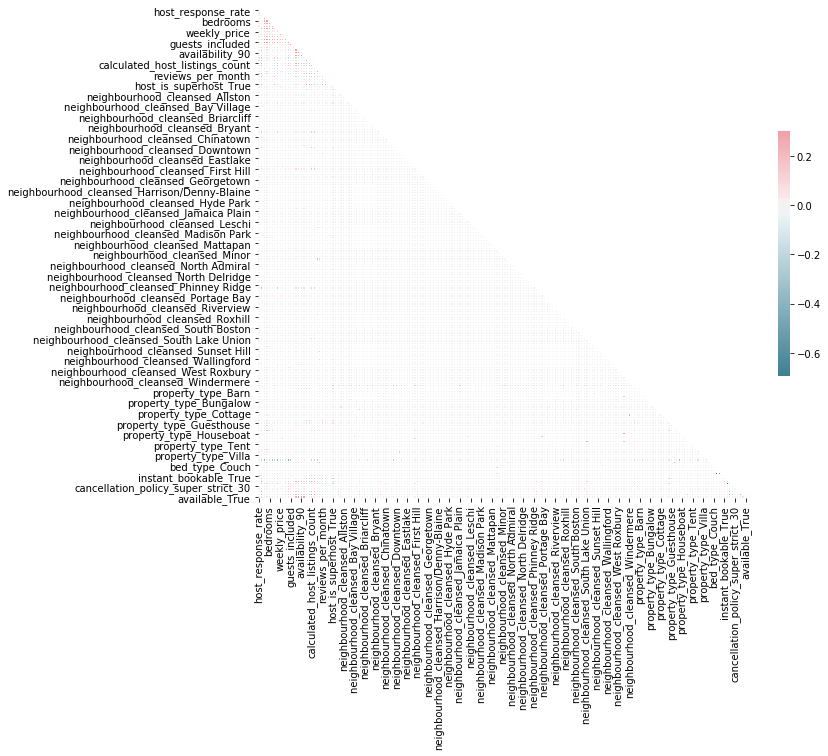

In [124]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [125]:
corr_matrix['score'].sort_values(ascending=False)

score                                              1.000000
host_is_superhost_True                             0.368763
amenities                                          0.183053
number_of_reviews_ltm                              0.162046
reviews_per_month                                  0.151192
cancellation_policy_moderate                       0.146941
number_of_reviews                                  0.145018
city_seattle                                       0.144506
property_type_Guest suite                          0.103642
host_identity_verified_True                        0.094759
is_location_exact_True                             0.082901
host_response_rate                                 0.074554
property_type_Townhouse                            0.071071
property_type_House                                0.066312
property_type_Guesthouse                           0.063224
neighbourhood_cleansed_Wallingford                 0.044824
bedrooms                                

### Q1: Get the positive and negative factors that can affact 'score' column
We can find out top 5 features affect the score positively:

host_is_superhost_True                             0.368763

amenities                                          0.183053

number_of_reviews_ltm                              0.162046

reviews_per_month                                  0.151192

cancellation_policy_moderate                       0.146941


and top 5 features affect the score negatively:

availability_30                                   -0.181728

calculated_host_listings_count_private_rooms      -0.195279

host_total_listings_count                         -0.225087

calculated_host_listings_count_entire_homes       -0.230170

calculated_host_listings_count                    -0.255190

We want to predict 'score' value. First, I will use Lineargression

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [131]:
X = df.drop(columns=['score','city_seattle'])
Y = df['score']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.2, random_state=42)

In [135]:
linear_model = LinearRegression(normalize=True)
linear_model.fit(X_train, y_train)
y_preds = linear_model.predict(X_test)
r2_scores = r2_score(y_test,y_preds)
r2_scores

0.24278702995958334

r2_score is really near zero, so LinearRegression is not best choice for us to predict the 'score'.

This time I will use RamdonForest model, and chose 10 features I have selected above.

In [139]:
from sklearn.ensemble import RandomForestRegressor

Features selecttion.According to the corr_matrix, and the correlation between two features, I will choose 20 featurs.

In [157]:
list_features = ['host_is_superhost_True',
                 'amenities',
                 'number_of_reviews_ltm',
                 'reviews_per_month',
                 'cancellation_policy_moderate',
                 'host_identity_verified_True',
                 'is_location_exact_True',
                 'host_response_rate',
                 'extra_people',
                 'security_deposit',
                 'calculated_host_listings_count',
                 'cancellation_policy_strict',
                 'neighbourhood_cleansed_Downtown',
                 'require_guest_phone_verification_True',
                 'require_guest_profile_picture_True',
                 'instant_bookable_True',
                 'require_guest_profile_picture_True',
                 'price',
                 'available_True',
                 'neighbourhood_cleansed_Chinatown']

In [144]:
X_rfg = df[list_features]
Y_rfg = df['score']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X_rfg, Y_rfg, test_size=0.3, random_state=42)

In [146]:
rfg_model = RandomForestRegressor(max_depth=8, random_state=42, n_estimators=100,
                                 min_samples_leaf = 2, min_samples_split = 10)
rfg_model.fit(X_train, y_train)
y_rfg_preds = rfg_model.predict(X_test)
r2_rfg_scores = r2_score(y_test, y_rfg_preds)
r2_rfg_scores

0.38408818776902665

It's better than lineargression, but still not good.

In [158]:
from sklearn.model_selection import GridSearchCV

In [159]:
rfg_model2 = RandomForestRegressor(random_state=42, n_jobs = -1)

In [160]:
list_features2 = ['host_is_superhost_True',
                 'amenities',
                 'cancellation_policy_moderate',
                 'host_identity_verified_True',
                 'is_location_exact_True',
                 'host_response_rate',
                 'security_deposit',
                 'calculated_host_listings_count',
                 'cancellation_policy_strict',
                 'require_guest_profile_picture_True',
                 'price',
                 'available_True']

In [161]:
X_rfg = df[list_features2]
Y_rfg = df['score']
X_train, X_test, y_train, y_test = train_test_split(X_rfg, Y_rfg, test_size=0.3, random_state=42)

In [162]:
param_grid = {'max_depth':[8, 16, 20],
              'min_samples_split':[8, 16, 20],
              'min_samples_leaf':[2, 4]}
grid_search = GridSearchCV(rfg_model2, param_grid, cv=3)
grid_search.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [8, 16, 20], 'min_samp

In [164]:
best_clf = grid_search.best_estimator_
best_clf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=16,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [170]:
best_clf.fit(X_train, y_train)

y_train_preds = best_clf.predict(X_train)
r2_train_scores = r2_score(y_train, y_train_preds)
r2_train_scores

0.796628873419946

In [171]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [172]:
y_test_preds = best_clf.predict(X_test)

In [174]:
r2_test_scores = r2_score(y_test, y_test_preds)
r2_test_scores

0.7932805174479262

In [175]:
mean_squared_error(y_train, y_train_preds)

11.729189042577834

In [176]:
mean_squared_error(y_test, y_test_preds)

11.986582806661007

Summary: RandomForest is a better model for predicting the score(scored by guests), both traing sets and testing set get an acceptable or a good re_score and MSE.

### Q2: Find a model to predict the score.
### Q3: What should a host do to improve the score of his house.

First, draw the important features.

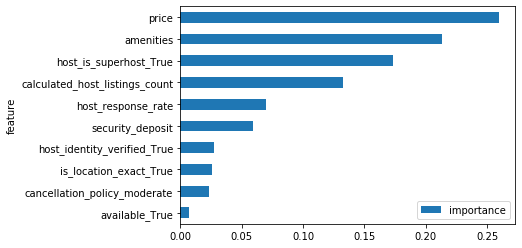

In [177]:
def show_importances(model, df):

    importances = model.feature_importances_ 
    feat_names = df.columns
    tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
    tree_result.sort_values(by='importance',ascending=True)[-10:].plot(x='feature', y='importance', kind='barh')

show_importances(best_clf,X_train)

Q1:


Q2: 
The best model to predict the score:
RandomForestRegressor(
                      bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=16,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)       

Q3: Acording to this image, we should conclude that all guests are happy to live a great house with a low price.

1, The host should decrease the price of his house properly. If his house get a higher score, more guests would like to rent his house.

2, Price, amenities, wether the host is a superhost, the number of host listings, response rate, security deposit would be top 6 factors that would help the host and his house to get a higher score. And the other 4 factors can only help the hosts a little.

## Future: Test other data sets

In [181]:
nyc_cal = pd.read_csv('./data/NYC/calendar.csv', low_memory=False)
nyc_list = pd.read_csv('./data/NYC/listings.csv', low_memory=False)

In [190]:
nyc_cal = nyc_cal.rename(columns={'listing_id': 'id'})
nyc_df = pd.merge(nyc_list,nyc_cal,on='id',how='outer')

In [192]:
nyc_df['price'] = nyc_df['price_y']

In [193]:
list_ori = [
    'host_is_superhost',            
    'amenities',                         
    'cancellation_policy',      
    'host_identity_verified',       
    'is_location_exact',            
    'host_response_rate',                
    'security_deposit',                  
    'calculated_host_listings_count',       
    'require_guest_profile_picture',
    'price',                             
    'available'                     
]

In [194]:
nyc_df = nyc_df[list_ori]

In [196]:
nyc_df['host_response_rate']=nyc_df['host_response_rate'].replace('[%]','',regex=True)
nyc_df['host_response_rate']=nyc_df['host_response_rate'].astype(float)
nyc_df['price']=nyc_df['price'].replace('[$,]','',regex=True).astype(float)
nyc_df['security_deposit']=nyc_df['security_deposit'].replace('[$,]','',regex=True).astype(float)

In [197]:
nyc_df.dropna(subset=list_ori, inplace=True, axis=0)

In [199]:
for col in ['host_is_superhost', 'host_identity_verified', 'is_location_exact',
            'require_guest_profile_picture', 'available']:
    nyc_df[col].replace('f','False', inplace=True)
    nyc_df[col].replace('t', 'True', inplace=True)

In [200]:
nyc_df.select_dtypes(include=['object']).columns

Index(['host_is_superhost', 'amenities', 'cancellation_policy',
       'host_identity_verified', 'is_location_exact',
       'require_guest_profile_picture', 'available'],
      dtype='object')

In [201]:
col_nyc_obj = ['host_is_superhost', 'amenities', 'cancellation_policy',
       'host_identity_verified', 'is_location_exact',
       'require_guest_profile_picture', 'available']

Need to be finished....